# Data Visualization (with Matplotlib and Seaborn)

The primary tool in the Python ecosystem for plotting data and creating figures is **Matplotlib**. This is a very powerful library that gives you access and control of every little thing in creating a figure. This can be good and bad and presents a somewhat steep learning curve - you often have to write many lines of code to produce a simple graphic. A more recent entrant into the PyData community is **Seaborn** (https://stanford.edu/~mwaskom/software/seaborn/examples/index.html). Seaborn is essentially a wrapper around Matplotlib and aims to provide simple access to common types of data visualizations. Also, the Matplotlib default aesthetics are a bit plain, and another thing Seaborn provides is really pretty graphics right out of the box. We're going to learn to use both of these, be sure to pay close attention to when we're using each. 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_notebook, show

# This makes sure viz are included in the notebooks.
%matplotlib inline

In [7]:
# here we set some aesthetic parameters so that all of our figures are nice and big
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
sns.set(style="white", context="talk")

In [8]:
# Fetch some data to work with
bike_cols = ["datetime","season","holiday","wkday","weather","temp","atemp","humidity","wind","casual","registered","ct"]
filepath = '/Users/anna/GA/DAT-DC-10/data/bikeshare.csv'
bikes = pd.read_csv(filepath, header=0, names=bike_cols, na_filter=False)
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
drinks = pd.read_csv("/Users/anna/GA/DAT-DC-10/data/drinks.csv", header=0, names=drink_cols, na_filter=False)

In [9]:
bikes.describe()

,season,holiday,wkday,weather,temp,atemp,humidity,wind,casual,registered,ct
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
bikes.head(2)

,datetime,season,holiday,wkday,weather,temp,atemp,humidity,wind,casual,registered,ct
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40


## Histograms
A histogram presents a bar plot to visualize the relative counts of occurence of each possible category. With discrete/categorical variables, we simply count things up and create a bar plot. With continuous variables, you end up creating implicit "categories" by binning up the continuous values into discrete chunks and then counting.

In [11]:
bikes.head(5)

,datetime,season,holiday,wkday,weather,temp,atemp,humidity,wind,casual,registered,ct
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1


We can get some plotting functionality for free from Pandas - Data Frames have built-in methods for calling Matplotlib. 

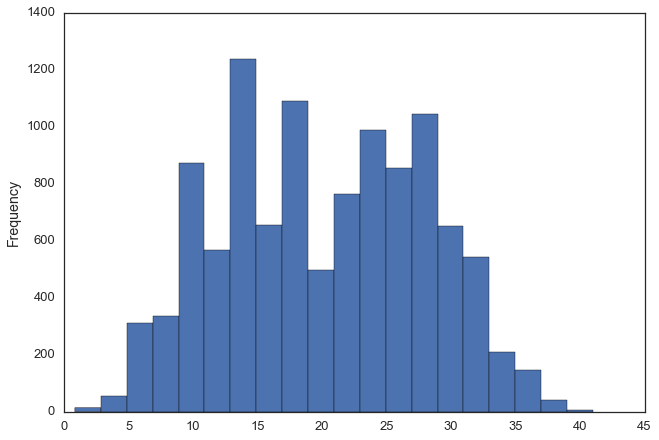

In [12]:
# PANDAS and matplotlib
# drinks.beer.plot(kind="hist",bins=15)
# movies.star_rating.plot(kind="hist", bins=20)
bikes.temp.describe()
bikes.temp.plot(kind="hist", bins = 20)

The histogram visualizes the *distribution* of the values in the **beer** variable. Most are less than 25, but there are some data points all the way out past 350.

Notice that this Matplotlib functionality is built into Data Frames - so it doesn't *appear* that we're calling any external functions. But just to be clear, here's how you would accomplish the same thing more directly using functions from Matplotlib.

(array([   14.,    55.,   313.,   335.,   874.,   566.,  1236.,   655.,
         1090.,   497.,   765.,   988.,   856.,  1045.,   652.,   542.,
          210.,   145.,    41.,     7.]),
 array([  0.82 ,   2.829,   4.838,   6.847,   8.856,  10.865,  12.874,
         14.883,  16.892,  18.901,  20.91 ,  22.919,  24.928,  26.937,
         28.946,  30.955,  32.964,  34.973,  36.982,  38.991,  41.   ]),
 <a list of 20 Patch objects>)

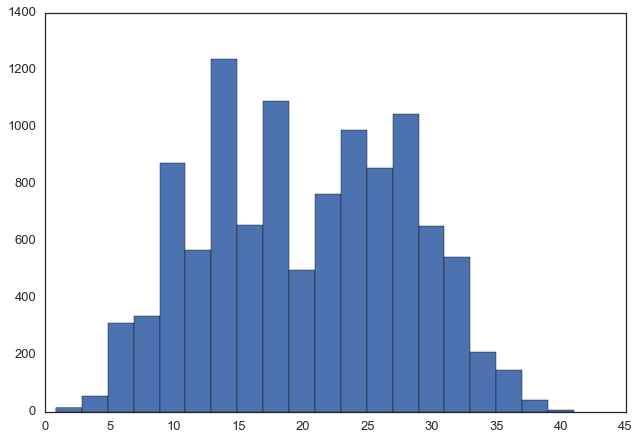

In [13]:
# Calling Matplotlib directly
# plt.hist(drinks.beer,15)
# plt.hist(movies.star_rating, 20)
plt.hist(bikes.temp, 20)

In [14]:
bikes.ct.describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: ct, dtype: float64

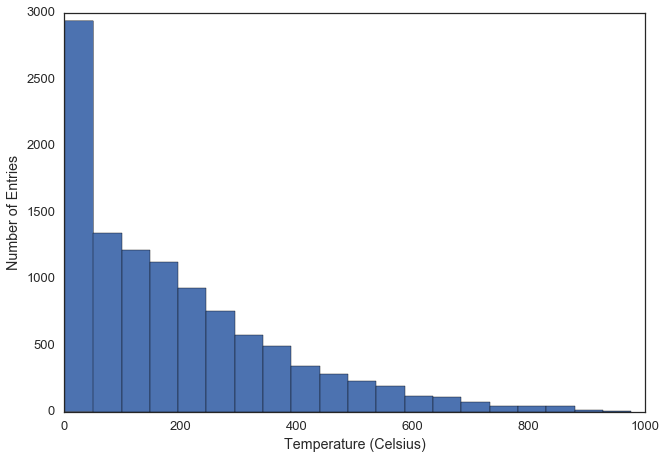

In [15]:
plt.hist(bikes.ct, 20)
plt.xlabel("Temperature (Celsius)")
plt.ylabel("Number of Entries")

We can also do this with Seaborn just as easily.

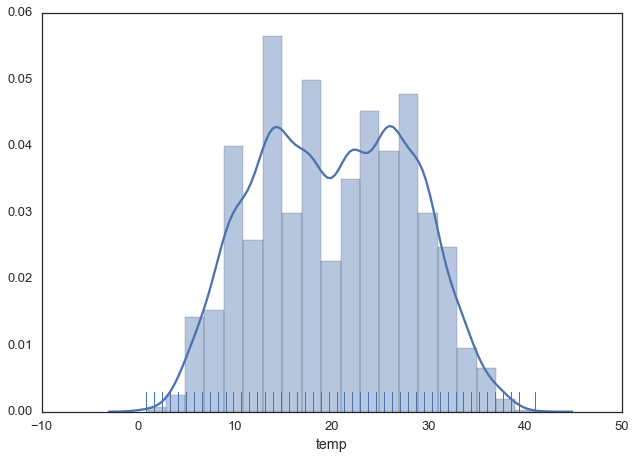

In [16]:
# Seaborn (rug plot is individual data points), kde (kernel distributon estimation)
# sns.distplot(drinks.beer,  rug=True)
# sns.distplot(movies.star_rating, rug=True)
# Question: Doesn't each rug spike represent a single point? 
# Examples of how best to use kde's?
sns.distplot(bikes.temp, rug=True, bins = 20)

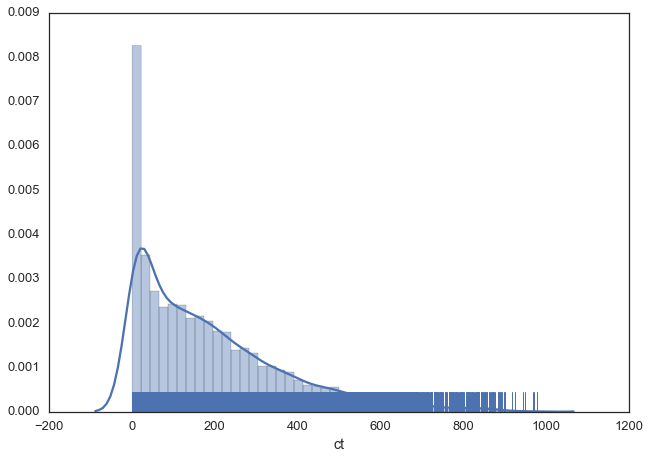

In [17]:
sns.distplot(bikes.ct, rug=True)

Seaborn throws in a *rugplot* and a *kernel density estimate* on top of the histogram. These can all be added or removed with the right arguments.

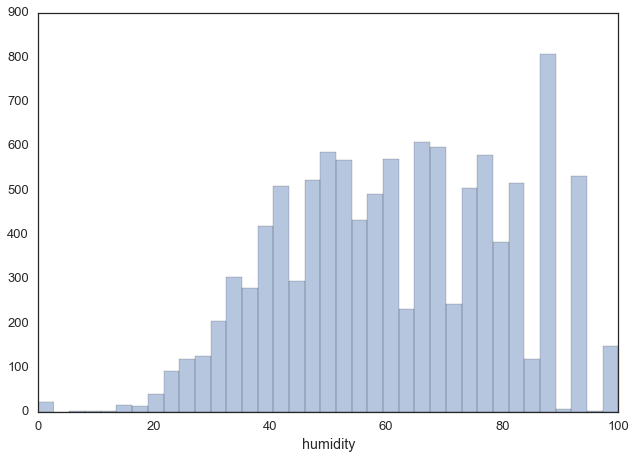

In [18]:
# sns.distplot(drinks.beer, rug=False, kde=False)
# sns.distplot(movies.star_rating, rug=False, kde=False)
sns.distplot(bikes.humidity, rug=False, kde=False)

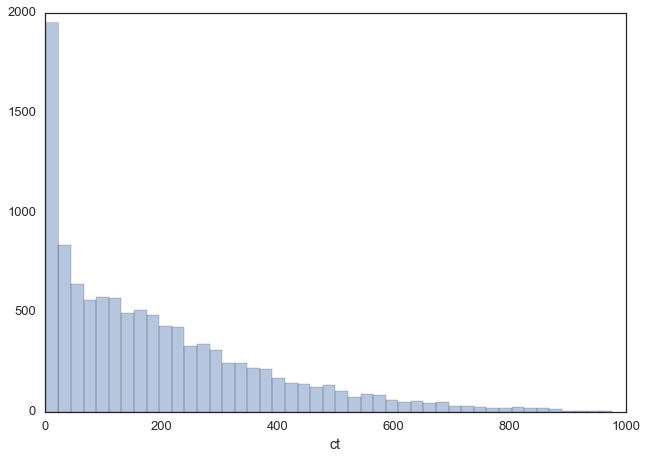

In [19]:
sns.distplot(bikes.ct, rug=False, kde=False)

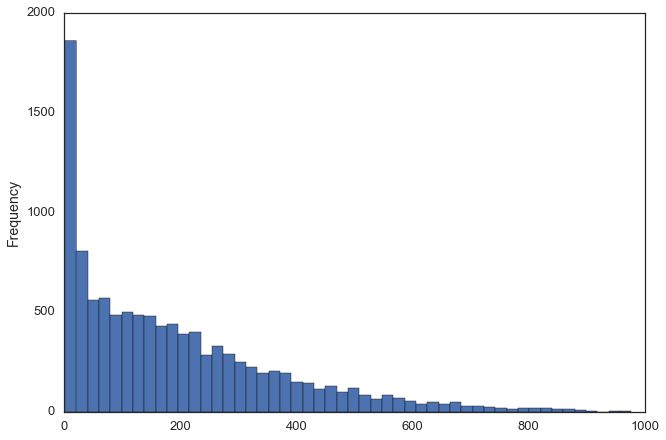

In [20]:
bikes.ct.plot(kind="hist", bins=50)

## Scatterplot
We often want to visualize a *bivariate* distribution - how are two variables related to one another? 

In [21]:
# drinks[["beer","wine"]].head()
# movies.head()
bikes[["season", "holiday", "wkday", "temp", "humidity", "wind", "ct"]].head()

,season,holiday,wkday,temp,humidity,wind,ct
0,1,0,0,9.84,81,0,16
1,1,0,0,9.02,80,0,40
2,1,0,0,9.02,80,0,32
3,1,0,0,9.84,75,0,13
4,1,0,0,9.84,75,0,1


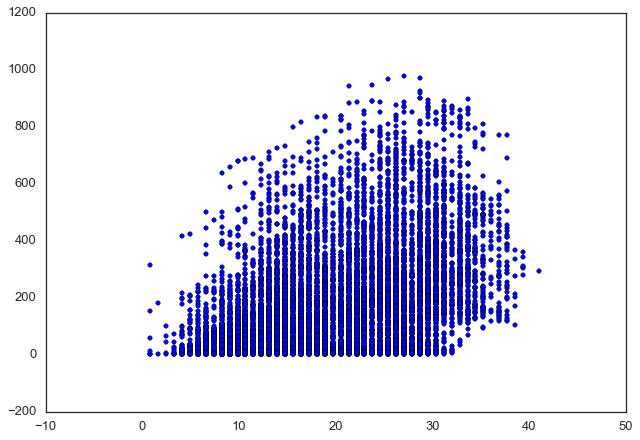

In [22]:
# plt.scatter(x=drinks.beer, y= drinks.wine)
# plt.scatter(x=movies.star_rating, y=movies.duration)
plt.scatter(x=bikes.temp, y=bikes.ct)

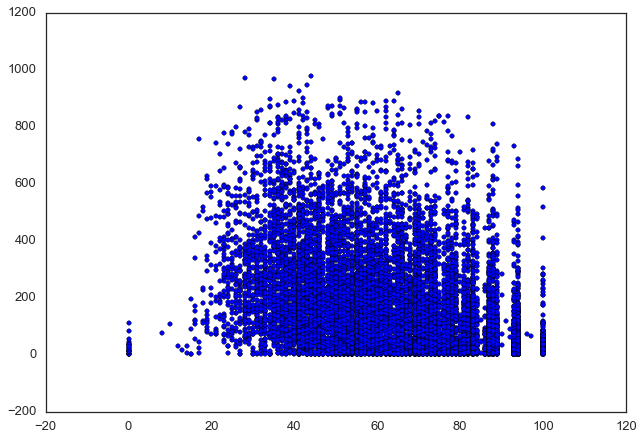

In [23]:
plt.scatter(x=bikes.humidity, y=bikes.ct)

/Users/anna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


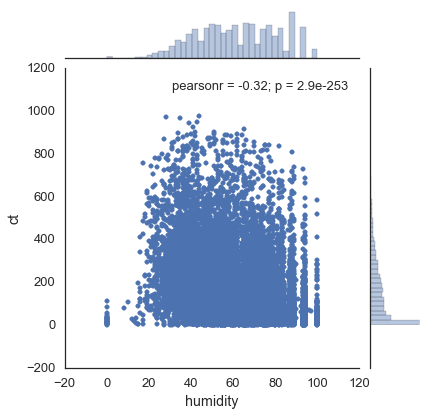

In [24]:
# sns.jointplot("beer","wine",data=drinks)
# sns.jointplot("star_rating", "duration", data=movies)
sns.jointplot("humidity", "ct", data=bikes)

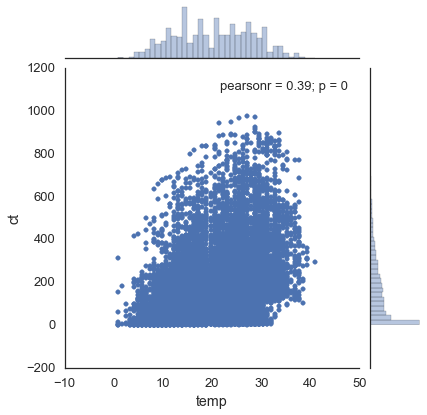

In [25]:
sns.jointplot("temp","ct", data=bikes)

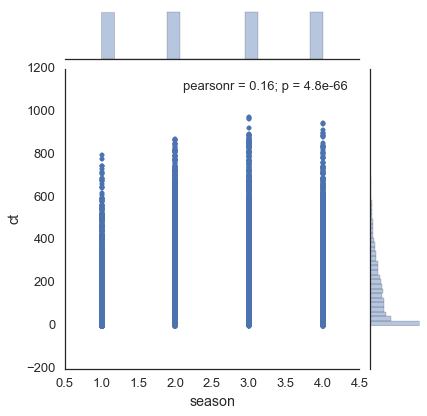

In [26]:
# movies.duration.describe()
sns.jointplot("season","ct", data=bikes )

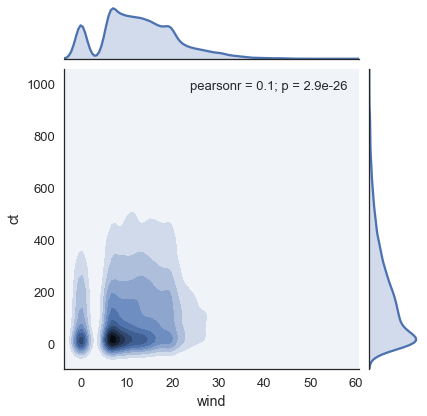

In [27]:
sns.jointplot("wind","ct", data=bikes, kind= "kde")

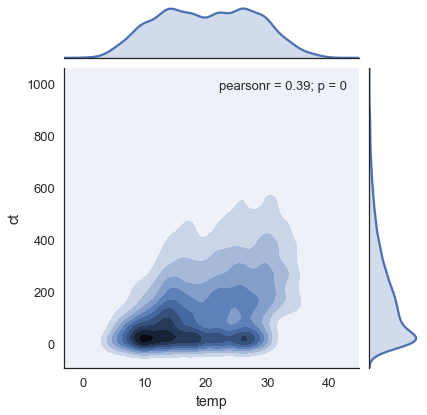

In [28]:
sns.jointplot("temp", "ct", data=bikes, kind="kde")

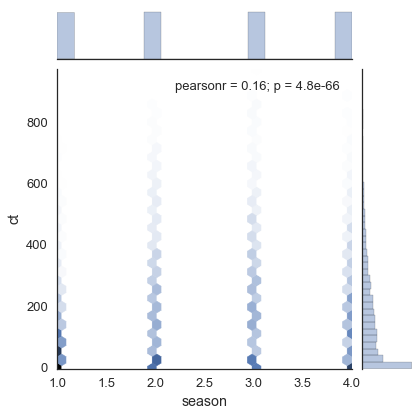

In [29]:
# sns.jointplot("beer","wine", data=drinks[(drinks.beer < 100) & (drinks.wine < 30)] , kind = "hex")
sns.jointplot("season","ct", data=bikes, kind= "hex")
# I am using these plots incorrectly.

Make sure you label your axes. 

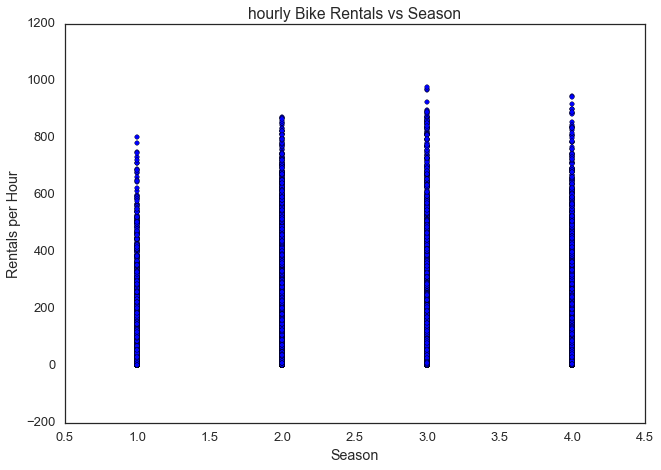

In [30]:
plt.scatter("season","ct", data=bikes )
plt.ylabel("Rentals per Hour")
plt.xlabel("Season")
plt.title("hourly Bike Rentals vs Season")

## Scatterplot Matrix
Let's look at every bivariate visualization at once

In [31]:
# pd.scatter_matrix(drinks[['beer', 'spirit', 'liters']])
movies.head(3)
#movies['act'] = movies['actors_list'].map(lambda x: len(x.split(',')))
#movies.head(3)
#movies.content_rating.value_counts()
#movies['content_num'] = movies['content_rating'].map(lambda x: x[0:1])
#movies.head(10)
def f(x):
    if x == "G" or x == "GP":
        return 50.0
    elif x == "PG" or x == "GP":
        return 150.0
    elif x == "PG-13" or x == "APPROVED" or x == "PASSED":
        return 200.0
    elif x == "NOT RATED" or x == "":
        return 300.0
    elif x == "R":
        return 400.0
    elif x == "NC-17" or x == "TV-MA":
        return 500.0
    elif x == "X":
        return 600.0

movies['cont'] = movies["content_rating"].map(f)
movies.head(2)

NameError: name 'movies' is not defined

In [32]:
#sns.pairplot(movies[["star_rating","duration","cont"]])
#drinks.beer.describe()
#drinks.head(1)
#movies.cont.describe()
#movies.duration.describe()
bikes.head(3)

,datetime,season,holiday,wkday,weather,temp,atemp,humidity,wind,casual,registered,ct
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32


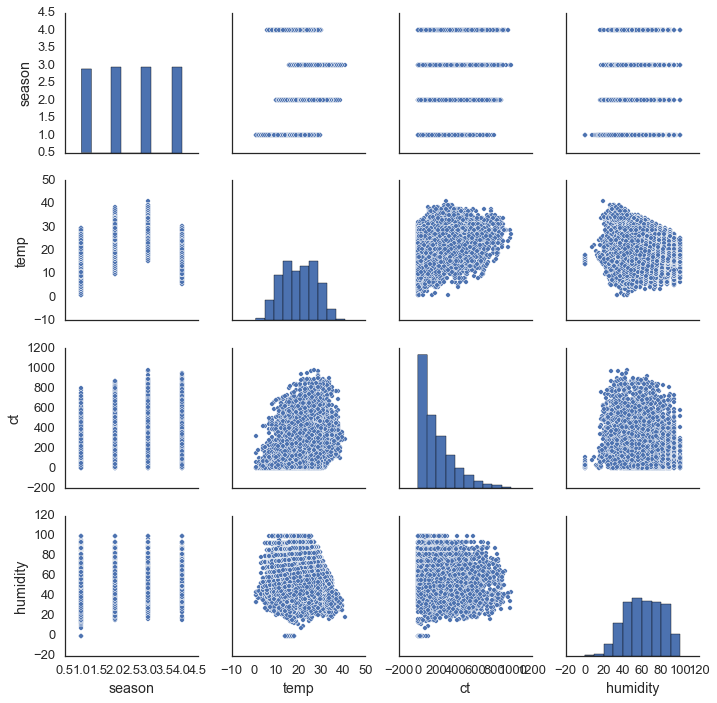

In [33]:
sns.pairplot(bikes[["season","temp", "ct", "humidity"]])
# sns.pairplot(movies[["star_rating","duration"]])
# I'm not sure why when I put in "cont" as the third parameter it doesn't display?  
# Question: it is a categorical attribute vs continuous?

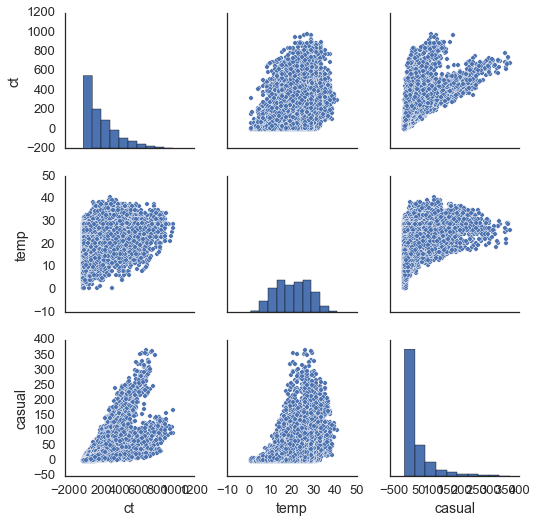

In [34]:
sns.pairplot(bikes[["ct","temp","casual"]])
# Question:  
# why aren't the temp vs temp etc x=y lines?

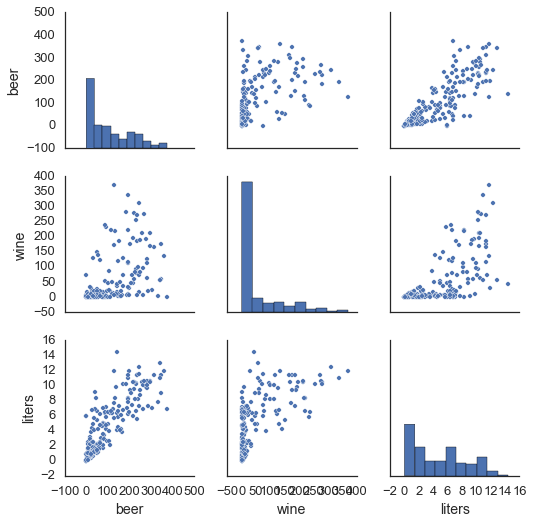

In [35]:
sns.pairplot(drinks[["beer","wine","liters"]])

/Users/anna/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


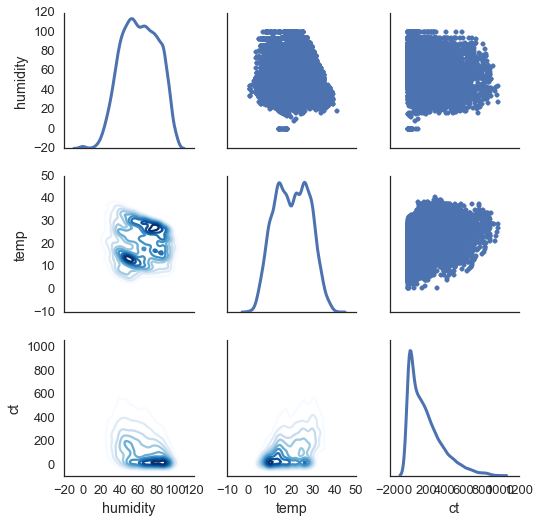

In [36]:
#myGraphic = sns.PairGrid(drinks[["beer","wine","liters"]], diag_sharey=False)
#myGraphic.map_lower(sns.kdeplot, cmap="Blues")
#myGraphic.map_upper(plt.scatter)
#myGraphic.map_diag(sns.kdeplot, lw=3)
myGraphic = sns.PairGrid(bikes[["humidity","temp","ct"]], diag_sharey=False)
myGraphic.map_lower(sns.kdeplot, cmap="Blues")
myGraphic.map_upper(plt.scatter)
myGraphic.map_diag(sns.kdeplot, lw=3)

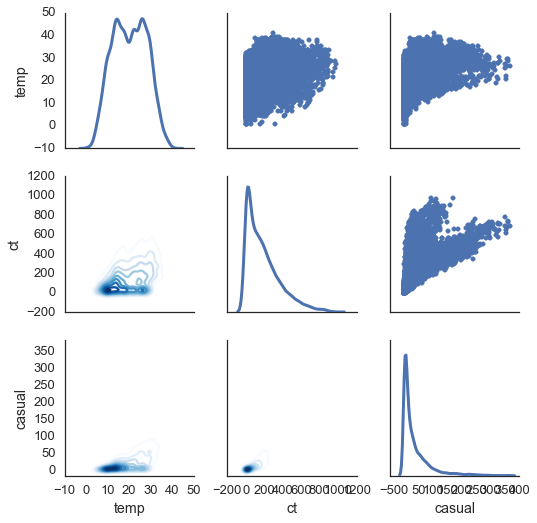

In [37]:
myGraphic = sns.PairGrid(bikes[["temp","ct","casual"]], diag_sharey=False)
myGraphic.map_lower(sns.kdeplot, cmap="Blues")
myGraphic.map_upper(plt.scatter)
myGraphic.map_diag(sns.kdeplot, lw=3)
# Question:

## Barplot
Visualize counts across discrete variables

In [38]:
#drinks.continent.value_counts()
bikes.season.value_counts()
# Question:  Does this just count # of records 

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

This Pandas "Series" has a nice plot method

In [39]:
# drinks.continent.value_counts().plot(kind="bar")
# Question:  Is there an easier way to do this?  I need to know the #'s
a = [sum(bikes[bikes.season == i].ct) for i in range(1,5)]
a

[312498, 588282, 640662, 544034]

In [40]:
bikes.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

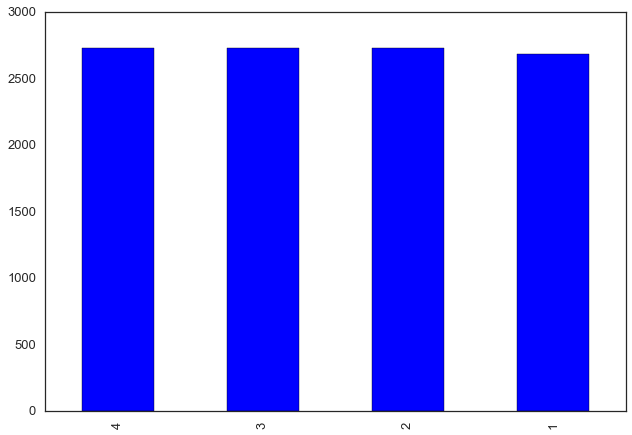

In [41]:
bikes.season.value_counts().plot(kind="bar")

In [42]:
bikes.groupby('season').mean()

,holiday,wkday,weather,temp,atemp,humidity,wind,casual,registered,ct
season,,,,,,,,,,
1,0.026433,0.680566,1.424423,12.530491,15.228956,56.297841,14.636978,15.489576,100.853686,116.343261
2,0.017563,0.692645,1.422978,22.823483,26.647098,60.852909,13.405607,47.446762,167.804610,215.251372
3,0.035126,0.675082,1.366630,28.789111,32.540783,64.123674,11.508862,52.220271,182.196853,234.417124
4,0.035113,0.675201,1.459766,16.649239,20.059909,66.173738,11.678147,28.580834,170.407462,198.988296


In [43]:
bikes.groupby('season').ct.sum()

season
1    312498
2    588282
3    640662
4    544034
Name: ct, dtype: int64

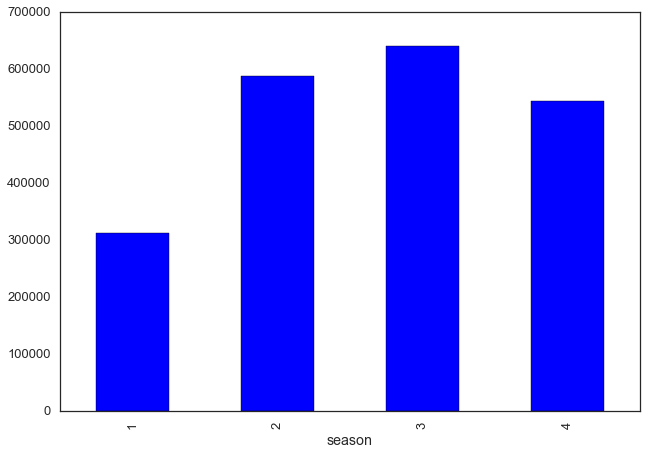

In [44]:
bikes.groupby('season').ct.sum().plot(kind='bar')
# Question:  How do I overlay the mean on this plot?

In [45]:
# calculate the mean alcohol amounts for each continent
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


Pandas groupBy() has some useful behavior with plots 

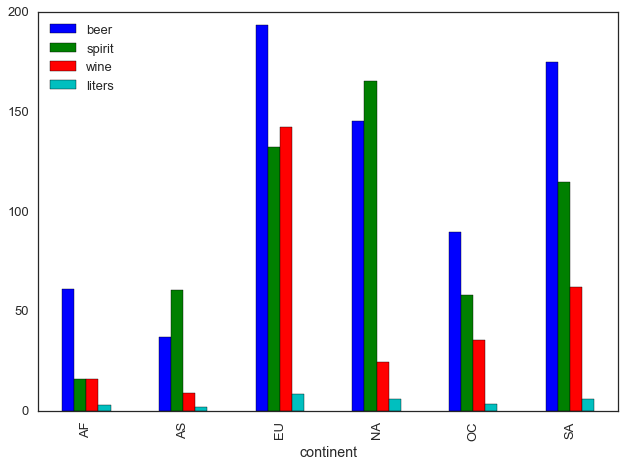

In [46]:
# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar')
# Question:  Can you groupby ranges ? Or do I need to add in another column based on range

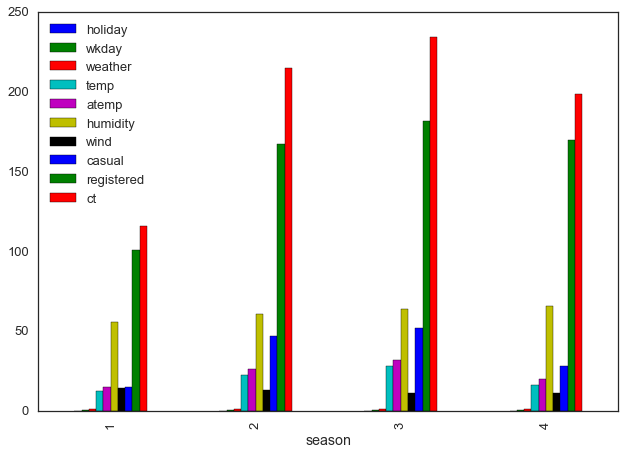

In [47]:
# Question:  Can you groupby ranges ? Or do I need to add in another column based on range
# How do I increase the x=axis?
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 8
sns.set(style="white", context="talk")
bikes.groupby('season').mean().plot(kind='bar')


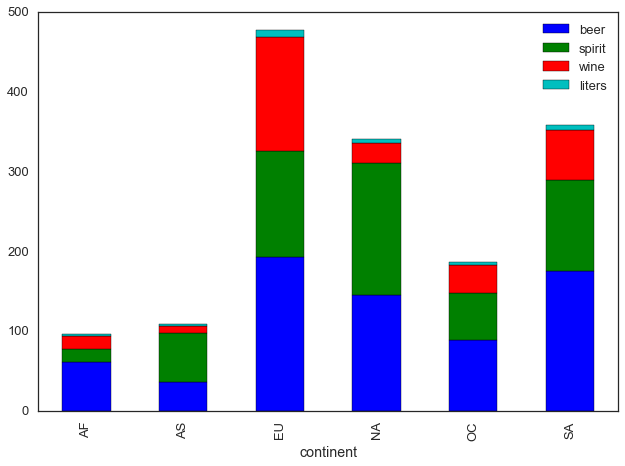

In [48]:
drinks.groupby('continent').mean().plot(kind='bar',stacked=True)

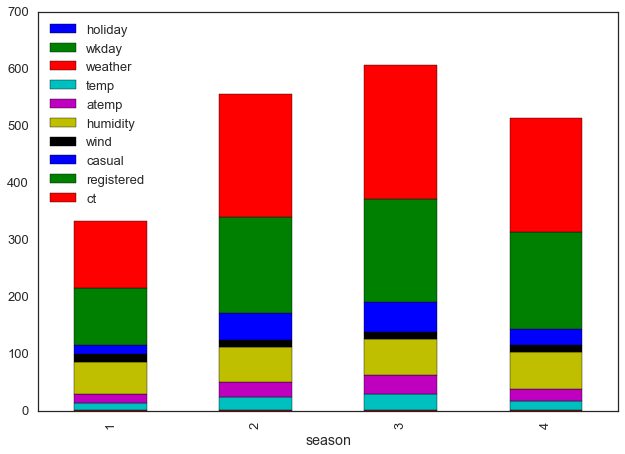

In [49]:
bikes.groupby('season').mean().plot(kind='bar',stacked=True)

## BoxPlot
Another useful way of visualizing the distribution of a variable. A box plot shows the quantiles of a distribution.

In [50]:
drinks.beer.describe()

count    193.000000
mean     106.160622
std      101.143103
min        0.000000
25%       20.000000
50%       76.000000
75%      188.000000
max      376.000000
Name: beer, dtype: float64

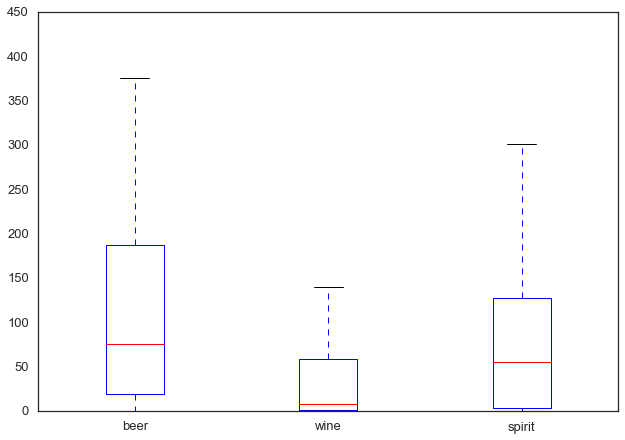

In [51]:
drinks[["beer","wine","spirit"]].plot(kind="box")

In [52]:
bikes.casual.describe()

count    10886.000000
mean        36.021955
std         49.960477
min          0.000000
25%          4.000000
50%         17.000000
75%         49.000000
max        367.000000
Name: casual, dtype: float64

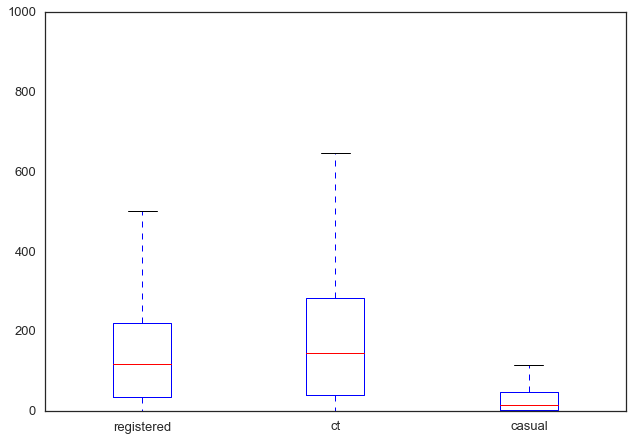

In [53]:
bikes[["registered","ct","casual"]].plot(kind="box")

/Users/anna/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:1613: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


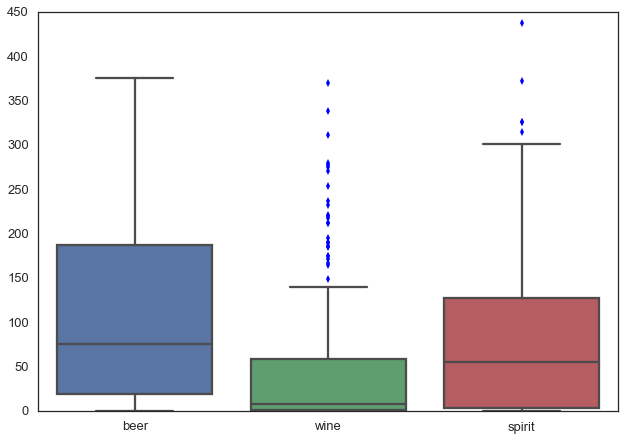

In [54]:
sns.boxplot(drinks[["beer","wine","spirit"]])

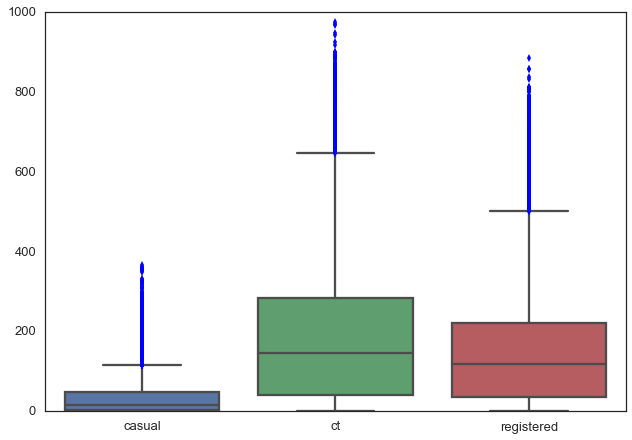

In [55]:
sns.boxplot(bikes[["casual","ct","registered"]])

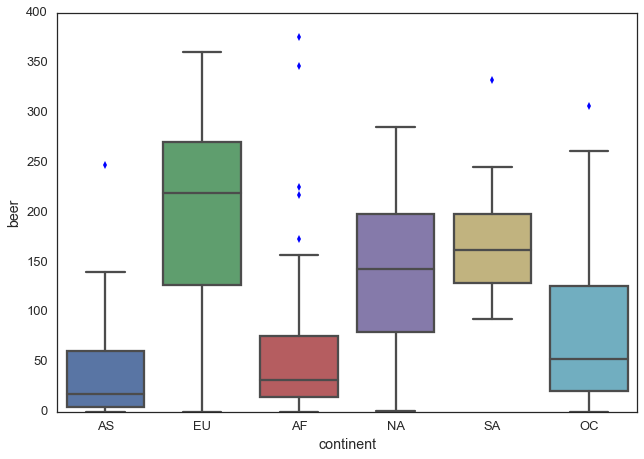

In [56]:
sns.boxplot(x="continent",y="beer",data=drinks)

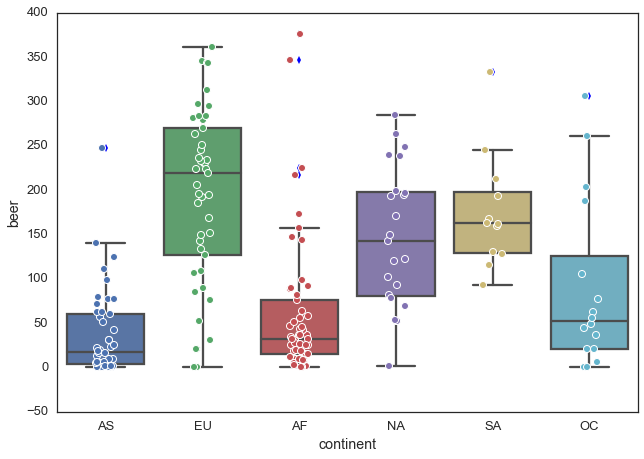

In [57]:
sns.boxplot(x="continent",y="beer",data=drinks)
sns.stripplot(x="continent",y="beer",data=drinks,jitter=True)

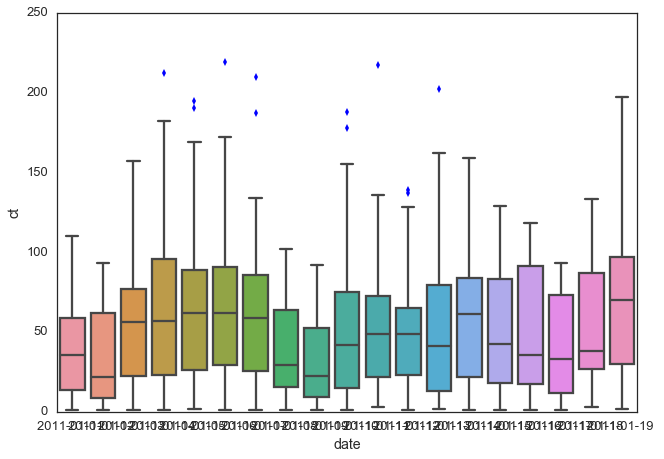

In [58]:
bikes["date"] = bikes["datetime"].map(lambda(x): x[0:11]) # Grabs the date
# Question:  
# 1. How to optimize
# 2. How to change font-size? or tilt x-axis labels?
# 3. How to get this to display say two months worth of hours using slider...
# 4. How to have a set boxplot using or prior model calculated?
#bikes.head(2)
#bikes.groupby('date').describe()
#bikes.groupby('date').mean()
#bikes.groupby('date')
month_bk = bikes[(bikes.date <= "2011-01-30")]
month_bk.shape
sns.boxplot(x="date",y="ct",data=month_bk)


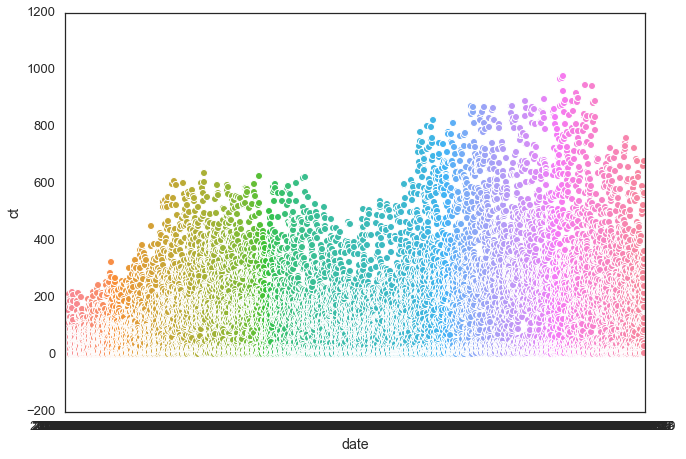

In [59]:
# Question: Clearly I am not using this correctly !  This has to be
# grouped by or categorical (like season) in some way
sns.stripplot(x="date",y="ct",data=bikes,jitter=True)


In [160]:
bikes["year"] = bikes["datetime"].map(lambda(x): int(x[0:4])) # Grabs year
bikes["month"] = bikes["datetime"].map(lambda(x): int(x[5:7])) # Grabs month
# Question:  Is there an easier way??
# sns.stripplot(x="date",y="ct",data=bikes,jitter=True)
for i, row in bikes.iterrows():
    # print i, row["year"], row["month"], type(row["year"])
    if row["year"] == 2012:
        bikes.loc[i,"md"] = 2 * row['month']
    else:
        bikes.loc[i,"md"] = row['month']


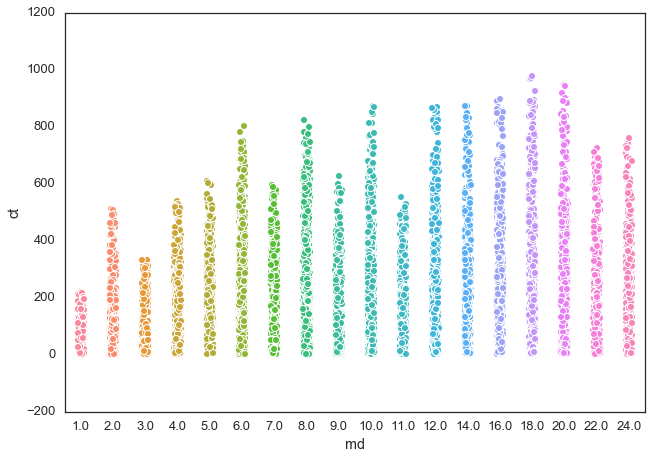

In [166]:
#bikes.groupby("md").ct.mean()
# Question: Is this the right use of strip plot ?
sns.stripplot(x="md",y="ct",data=bikes,jitter=True)

## LinePlot
Visualize some variable relative to a fixed ordering. For example, plotting a time series - the value of some variable at each time point.

In [ ]:
# Load in the UFO data set
url = '../data/ufo.csv'
ufo = pd.read_csv(url)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

# counts occurences per year
ufo.Year.value_counts().sort_index().head(10)

In [ ]:
ufo.Year.value_counts().sort_index().plot()
plt.ylabel("UFO Sightings")
plt.xlabel("Year")

## Grids
Often helpful to look at many variables simultaneously while separating the data into different segments (like a visual groupby).

In [ ]:
drinks.boxplot(by='continent')

In [ ]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent')

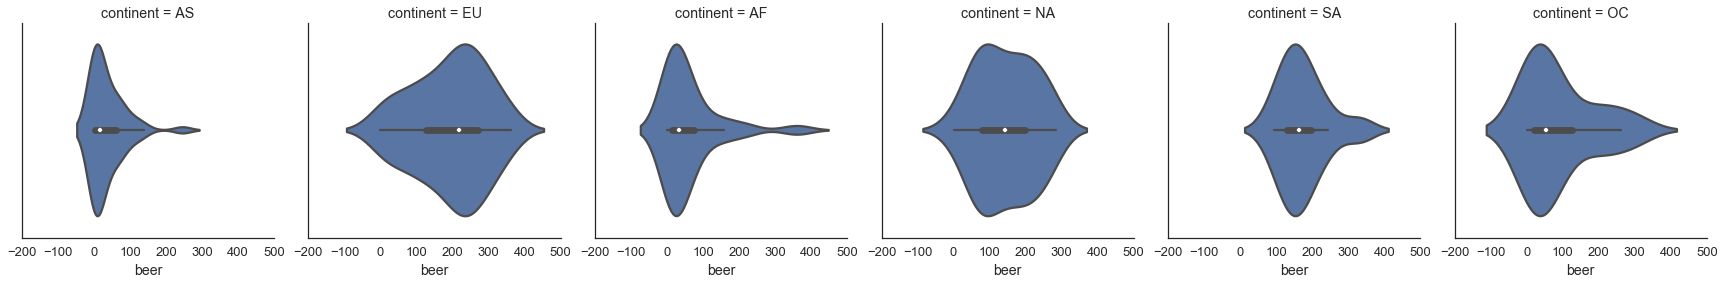

In [167]:
sns.factorplot(x="beer",col="continent",data=drinks,kind="violin")


Many complicated grids are possible (https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html)

## Saving

In [ ]:
sns.factorplot(x="beer",col="continent",data=drinks,kind="violin")
plt.savefig('../../../../beer_histogram.png')

### Bokeh
The newest kid on the block is Bokeh (http://bokeh.pydata.org/), a python library that is a wrapper for some HTML/javascript plotting tools. This way, we can use simple Python commands to utilize the power of web technologies to have immersive, interactive data visualizations.